In [ ]:
import numpy as np
import os, os.path
import csv 
from sklearn.utils import shuffle
from sklearn.model_selection import  StratifiedKFold
from collections import namedtuple
from sklearn import tree
import math
import numpy.matlib as mb
import matplotlib.pyplot as plt
import random
import math
import random
import pandas as pd
from sklearn.metrics import accuracy_score
import base64

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
def isOnlyDigit(value):

  for c in value:
    if (c < '0' or c > '9') and c != ' ':
      return False;
      
  return True; 

In [ ]:
def meanCalculate(Data):

    meanSumStore = np.zeros(27).astype(int)
    meanCntStore = np.zeros(27).astype(int)
    meanStore = np.zeros(27).astype(int)
    tmpStore = np.zeros(27).astype(int)
    Flag = True
    totalCol = 0
    testCnt = 0
    for Row in Data : 
        n = len(Row)-1
        totalCol = n
        if Flag : 
            Flag = False
            continue 
        
        i = 0 
        RowX = []

        for Value in Row : 
            if(i != 2):
                isString = False
                if(isinstance(Value, str)):
                    if isOnlyDigit(Value) == True and Value != "" and Value != " " and Value != " " and Value != "  ":
                      Value = int(Value)
                    else:
                      isString = True
                if isString == False:
                  meanSumStore[i] += int(Value)
                  meanCntStore[i] += int(1)
                  #testCnt += 1

            i = i+1 


    for x in range(0, totalCol):
      if x == 2:
        continue;
      
      meanStore[x] = int(math.floor(int(meanSumStore[x]) / meanCntStore[x]))
      
    return np.array(meanStore) 

In [ ]:
def LoadDataSet(fileName):
    Data = []
    with open(fileName, 'r') as File: 
      csvReader = csv.reader(File)
      for Row in csvReader:        
        Data.append(Row) 

    X = []
    Y = []
    Flag = True
    total7 = 0
    total2 = 0
    cnt = 0
    

    meanValue = meanCalculate(Data);
    #featureList = ['Thana', 'District', 'Accident_Severity', 'Month', 'Year', 'Time',
    #   'Junction_Type', 'Traffic_Control', 'Movement', 'Divider', 'Weather',
    #   'Light', 'Road_Geometry', 'Surface_Condition', 'Surface_Type',
    #   'Surface_Quality', 'Road_Class', 'Road_Feature', 'Location_Type',
    #   'Vehicle_Type', 'Vehicle_Movement', 'Vehicle_Loading', 'Vehicle_Defect',
    #   'Vehicle_Driver_Age', 'Vehicle_Alcohol', 'Vehicle_Seat_Belt']


    #featureList = ['Accident_Severity','Location_Type','Divider','Movement','Road_Geometry','Light','Weather','Traffic_Control', 'Time','Vehicle_Defect', 'Road_Class']
    #featureList = []
    featureList = ['Accident_Severity','Movement', 'Traffic_Control', 
                   'Vehicle_Defect', 'Vehicle_Movement', 'Road_Class', 'Vehicle_Type', 'Light'];
    
    mpFeature = np.zeros(27).astype(int)

    for Row in Data :
        i = 0 
        for Value in Row :
          ok = 0
          if(i==0):
            Value="Thana"
          #print(Value)
          
          for col in featureList:
            if col == Value:
              ok = 1;
              break;
          if(ok == 1):
            mpFeature[i] = 1
          i += 1
        break;
    #print(mpFeature)

    fatalDelete = 0
    gDelete = 0

    for Row in Data : 
        if Flag : 
            Flag = False
            continue 
        i = 0 
        n = len(Row)-1
        RowX = []
        cnt += 1

        if(cnt == 12998 or cnt == 10427):
          continue;
        deleteKor = 0
        for Value in Row : 
            if(mpFeature[i] == 0):
              i += 1;
              continue;
            if i == 2:
              if Value == 'F' and fatalDelete > 0:
                fatalDelete -= 1
                deleteKor = 1
                break;
              elif Value == 'G' and gDelete > 0:
                gDelete -= 1
                deleteKor = 1
                break

            if(i == 2):
                if(Value == "7"):
                    total7 = cnt;
                if(Value == "2"):
                    total2 = cnt;

                Y.append(Value)
            else:
                if(isinstance(Value, str)):
                    #Value = int(Value);
                    if isOnlyDigit(Value) == True and Value != "" and Value != " " and Value != " " and Value != "  ":
                      Value = int(Value)
                    else:
                      Value=meanValue[i]

                RowX.append(int(Value))
            i = i+1 
        if deleteKor == 1:
          continue; 
        X.append(RowX)
    
    print(len(X))
    return np.array(X) , np.array(Y) 


In [ ]:
DataX , DataY = LoadDataSet("Full_Final.csv") # X ,Y
UniqueClass = np.unique(DataY)  #unique class in DataY
Labels = np.zeros(len(DataY))   #set all value 0 in Labels

#print("Total Dataset Size ",len(DataY))
#print("Total Unique Size ",len(UniqueClass))

#make unique number in each unique class label and store all unique value in Labels
#g = 1, b = 0 value set all labels

for i  in range(0,len(DataY)):
    for j in range(0,len(UniqueClass)):
        if UniqueClass[j] == DataY [i] : 
            Labels[i] = j
for i in range(0, len(DataY)):
    DataY[i] = Labels[i]
      
featureList = ['Thana', 'District', 'Month', 'Year', 'Time',
      'Junction_Type', 'Traffic_Control', 'Movement', 'Divider', 'Weather',
      'Light', 'Road_Geometry', 'Surface_Condition', 'Surface_Type',
      'Surface_Quality', 'Road_Class', 'Road_Feature', 'Location_Type',
      'Vehicle_Type', 'Vehicle_Movement', 'Vehicle_Loading', 'Vehicle_Defect',
      'Vehicle_Driver_Age', 'Vehicle_Alcohol', 'Vehicle_Seat_Belt']
df = pd.DataFrame(DataX, columns = featureList)
df['Accident_Severity'] = DataY
df.to_csv("processed_data.csv", index = False)

print(df)


FileNotFoundError: ignored

In [ ]:
def TestLearn(algoType):
    K = 5 
    DataX , DataY = LoadDataSet("Full_Final.csv") # X ,Y

    DataX , DataY = shuffle(DataX , DataY)

    #print(DataY[0], DataY[1], DataY[2]);

    #numpy lib start
    UniqueClass = np.unique(DataY)  #unique class in DataY
    Labels = np.zeros(len(DataY))   #set all value 0 in Labels

    print("Total Dataset Size ",len(DataY))
    print("Total Unique Size ",len(UniqueClass))

    #make unique number in each unique class label and store all unique value in Labels
    #g = 1, b = 0 value set all labels
    for i  in range(0,len(DataY)):
        for j in range(0,len(UniqueClass)):
            if UniqueClass[j] == DataY [i] : 
                Labels[i] = j

    DataTrainCell = []
    LabelTrainCell = []
    DataTestCell = []
    LabelTestCell = []
    global xTrain, yTrain, xTest, yTest

    xTrain, xTest, yTrain, yTest = train_test_split(DataX, Labels, train_size=0.10)

    #xTrain = xTest
    #xTest = xTrain
    #yTrain = yTest
    #yTest = yTrain

    #make test train dataset n_splits 
    dataProcess()

    print(len(xTrain), len(xTest))

    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
    for train_index, test_index in skf.split(xTrain, yTrain):
        #print("TRAIN:", len(train_index) )
        #print( "TEST:", test_index)
        DataTrainCell.append(xTrain[train_index])
        DataTestCell.append(xTrain[test_index])
        LabelTrainCell.append(yTrain[train_index])
        LabelTestCell.append(yTrain[test_index])
    
    #print(len(LabelTrainCell))

 

    MyStructModel = namedtuple( "MyStructModel", "Type")
    Model = MyStructModel (Type ="Cart")
    
    MyStructNet = namedtuple( "MyStructNet", "base_classifier iterations mclass classifiers beta")
    Net = MyStructNet (base_classifier = Model ,iterations =  7 , mclass =len(UniqueClass) , 
                       classifiers = None , beta = None)
    return Learn(Net , DataTrainCell,LabelTrainCell,DataTestCell,LabelTestCell, algoType)
     

In [ ]:
def CalculateEpsilon (D , PredictionSet , Labels ) :
    # where label i not equel to prediction set i then store this index number in ErrorIndeces then sum 
    # of all D of those index
    PredictionSet = np.array(PredictionSet)
    Labels = np.array(Labels)
    #por valo babe poira bujar cesta kor
    ErrorIndeces = np.where(PredictionSet !=Labels)[0]
    EpsilonKT = sum(np.take(D, ErrorIndeces))
    return EpsilonKT / (1 - EpsilonKT)

In [ ]:
def CalculateEpsilonValue (D , PredictionSet , Labels ) :
    # where label i not equel to prediction set i then store this index number in ErrorIndeces then sum 
    # of all D of those index
    PredictionSet = np.array(PredictionSet)
    Labels = np.array(Labels)
    #por valo babe poira bujar cesta kor
    ErrorIndeces = np.where(PredictionSet !=Labels)[0]
    EpsilonKT = sum(np.take(D, ErrorIndeces))
    return EpsilonKT

B = ep/(1-epsi)
log 10 (1/B)

log 10 (1/B)


In [ ]:
def dataProcess():
  global xTest, yTest;
  xTest = xTrain[0:int(len(xTrain)/2)]
  yTest = yTrain[0:int(len(yTrain)/2)]

In [ ]:
def ClassifyEnsemble (NetBeta, Netmclass, NetClassifiers , Data, Label, Limit, NetClassifiers1):
    Weights = []
    for Value in (np.array(NetBeta)) : 
        #print(Value)
        if Value == 0 :
            np.inf
            Weights.append(np.inf)
        else :
            Weights.append(math.log10(1/Value))

    Weights = np.array(Weights)
    P = np.zeros((len(Label),Netmclass))# p -> 2d array, row = length of label array, col = number of unique class

    for k in range(0,Limit) :
        PredictionK = NetClassifiers[k].predict(Data)
        #print(k,"---->",len(PredictionK))
        PredictionK = np.array(PredictionK)
        #print(PredictionK.shape ,P.shape , Weights.shape )
        
        for m in range(0, len(PredictionK)) : 
            #print("[m]" ,m )
            #print("PredictionK[m]" ,PredictionK[m] )
            #print("P[m,PredictionK[m]] " ,P[m][int(PredictionK[m])]  )
            P[m][int(PredictionK[m])] = P[m][int(PredictionK[m])] + Weights[k]

    return np.argmax(P,axis=1) , np.matlib.repmat(np.sum(P,axis = 1)[..., None],1,2)
    

In [ ]:
def preProcessY(DataY):
  UniqueClass = np.unique(DataY)  #unique class in DataY
  Labels = np.zeros(len(DataY))   #set all value 0 in Labels

  #make unique number in each unique class label and store all unique value in Labels
  #g = 1, b = 0 value set all labels
  for i  in range(0,len(DataY)):
      for j in range(0,len(UniqueClass)):
          if UniqueClass[j] == DataY [i] : 
              Labels[i] = j
  return Labels;


D {
  1/m, 1/m, 1/m
}

D{
  2, 4, 6
}

D{
  1/m, 1/m, 1/m
}

D{
  2, 1/m, 6
}



In [ ]:
def Learn(Net , DataTrain , LabelTrain, DataTest, LabelTest, algoType):
    Tk = Net.iterations #number of classifiers to generate
    K = len(DataTrain) #number of data sets 
    ###### porer code ta kaj na korle aita use kormu
    #NetClassifiers = []
    #for i in range(0,Tk*K) : 
    #    NetClassifiers.append([])
    #NetClassifiers = np.array(NetClassifiers)
    #

    DataX , DataY = LoadDataSet("Full_Final.csv") # X ,Y
    DataX , DataY = shuffle(DataX , DataY)
    DataY = preProcessY(DataY)

    global NetClassifiers, NetBeta, ClassifierCout
    NetClassifiers = []
    NetClassifiers1 = []
    NetBeta = []
    ClassifierCout = 0
    Error = []

    tError = 30
    
    for IndexK in range(0,K):
        
        DataTrainK = np.array(DataTrain[IndexK])
        LabelTrainK = LabelTrain[IndexK]
        DataTestK = DataTest[IndexK]
        LabelTestK = LabelTest[IndexK]
        TrainLength = len(LabelTrainK)
        #eto tuk
        #D = np.ones(TrainLength) / TrainLength
        #print(TrainLength, D.size)

        
        
        D = np.ones(TrainLength)/TrainLength

        
        if IndexK > 0 :
            #print("if K > 0 :")
            PredictionsTrainEnsemble , Posterior = ClassifyEnsemble (NetBeta, Net.mclass,
                                NetClassifiers ,DataTrainK, LabelTrainK, ClassifierCout, NetClassifiers1)
            EpsilonKT = CalculateEpsilonValue(D,PredictionsTrainEnsemble,LabelTrainK)
            BetaKT = EpsilonKT / (1-EpsilonKT)
            MatchedIndeces = np.where(PredictionsTrainEnsemble ==LabelTrainK)[0]
            np.put(D, MatchedIndeces, BetaKT* np.take(D, MatchedIndeces))

        #print("Dataset k = ",IndexK," ----------------------------------------")
       # ClassifierCout = 0
        for t in range(0,Tk) :
            #step 1 
            D = D / np.sum(D)#1

            index = np.random.choice(D.size, D.size, p=D)

            if len(DataTrainK) == len(LabelTrainK):

                if algoType == "mlp":
                  clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
                elif algoType == "nb":
                  clf = GaussianNB()
                else:
                  clf = tree.DecisionTreeClassifier()
                #clf = RandomForestClassifier(max_depth=2, random_state=0)

                #clf1 = RandomForestClassifier(max_depth=2, random_state=0)

                #NetClassifiers1.append(clf1.fit(DataTrainK, LabelTrainK))
                #tmpTrain = np.array(np.take(DataTrainK, index, axis=2)).astype(int)
                tmpLabel = np.array(np.take(LabelTrainK, index)).astype(int)

                tmpTrain = DataTrainK[index,:]

                #print(len(LabelTrainK), len(tmpLabel))

                #print(tmpTrain)
                #print(DataTrainK)

                NetClassifiers.append(clf.fit(DataTrainK, LabelTrainK))
                
                #step 4
                PredictionOnTrainSet = NetClassifiers[ClassifierCout].predict(DataTrainK)
                betaResult = CalculateEpsilon(D,PredictionOnTrainSet , LabelTrainK)

                NetBeta.append(betaResult)  


                #print("Iteration t= ", t)
                #print("Beta t =", CalculateEpsilon(D,PredictionOnTrainSet , LabelTrainK))
                
                #print("NetBeta :" , NetBeta)
                PredictionsTrainEnsemble , Posterior = ClassifyEnsemble (NetBeta, Net.mclass,
                                NetClassifiers ,DataTrainK, LabelTrainK, ClassifierCout, NetClassifiers1)
                
                #print(PredictionsTrainEnsemble);
                
                EpsilonKT = CalculateEpsilonValue(D,PredictionsTrainEnsemble,LabelTrainK)
                if EpsilonKT > 0.5 : 
                    EpsilonKT = 0.5
                BetaKT = EpsilonKT / (1-EpsilonKT)
                
                MatchedIndeces = np.where(PredictionsTrainEnsemble ==LabelTrainK)[0]
                np.put(D, MatchedIndeces, BetaKT* np.take(D, MatchedIndeces))
                D = D / np.sum(D)


                PredictionsTestEnmble , Posterior = ClassifyEnsemble (NetBeta, Net.mclass,
                                NetClassifiers ,DataTestK, LabelTestK, ClassifierCout, NetClassifiers1)
                
                totalMissClassifi = len(np.where(PredictionsTestEnmble != LabelTestK)[0])
                totalClassifi = len(LabelTestK) - totalMissClassifi
                errorRate = (totalMissClassifi / len(LabelTestK)) * 100
                errorRate = round(errorRate,2)
                Error.append(100- errorRate)

                FDTree = tree.DecisionTreeClassifier()
                FDClassifier = FDTree.fit(DataTrainK, LabelTrainK)

                fPredict = FDClassifier.predict(DataTestK)
                fPredict = np.array(fPredict)
                FtotalMissClassifi = len(np.where(fPredict != LabelTestK)[0])
                FerrorRate = (FtotalMissClassifi / len(LabelTestK)) * 100
                FerrorRate = round(FerrorRate,2)

                print(ClassifierCout, len(LabelTestK), totalClassifi, totalMissClassifi, FtotalMissClassifi, errorRate, FerrorRate)
                
                #print("result");
                #ac = accuracy_score(LabelTestK, PredictionsTestEnmble)
                #print(ac)
                #Error.append(ac)
                #tError -= random.randint(1,3)
                #PredictionOnTestSet = NetClassifiers[ClassifierCout].predict(DataTestK)
                #NetBeta = CalculateEpsilon(D,PredictionOnTrainSet , LabelTrainK)
                #PredictionOnTestSet = np.array(PredictionOnTestSet)
                #LabelTestK = np.array(LabelTest[IndexK])
                #TestSetError = np.where(PredictionOnTestSet !=LabelTestK)[0]
                #print("TestSetError" , TestSetError)
                #b = sum(np.take(D, TestSetError))
                #print("b" , b)

            else:
                print("Error")
            if (Error[ClassifierCout]) == 0 : 
                print("t = " , t , " , Error 0 asse")
            ClassifierCout = ClassifierCout + 1 

            
    return Error , ClassifierCout

In [ ]:
def convertInt(N):
  inc = base64.b64decode('MTA=')
  print(inc)
  return N + inc


In [ ]:
Error , Count = TestLearn(algoType="dec")
print(Count)
#print(len(Error))
#print(Error)

43087
Total Dataset Size  43087
Total Unique Size  4
4308 2154
43087
0 862 633 229 277 26.57 32.13
1 862 586 276 276 32.02 32.02
2 862 586 276 277 32.02 32.13
3 862 586 276 275 32.02 31.9
4 862 586 276 276 32.02 32.02
5 862 586 276 273 32.02 31.67
6 862 586 276 276 32.02 32.02
7 862 712 150 298 17.4 34.57
8 862 712 150 300 17.4 34.8
9 862 712 150 300 17.4 34.8
10 862 712 150 300 17.4 34.8
11 862 712 150 297 17.4 34.45
12 862 712 150 299 17.4 34.69
13 862 581 281 295 32.6 34.22
14 862 732 130 290 15.08 33.64
15 862 732 130 293 15.08 33.99
16 862 721 141 289 16.36 33.53
17 862 721 141 289 16.36 33.53
18 862 721 141 292 16.36 33.87
19 862 721 141 287 16.36 33.29
20 862 721 141 289 16.36 33.53
21 861 722 139 294 16.14 34.15
22 861 722 139 292 16.14 33.91
23 861 722 139 293 16.14 34.03
24 861 722 139 291 16.14 33.8
25 861 722 139 294 16.14 34.15
26 861 722 139 294 16.14 34.15
27 861 722 139 297 16.14 34.49
28 861 718 143 297 16.61 34.49
29 861 718 143 303 16.61 35.19
30 861 717 144 296 16.7

In [ ]:
mlpAcc , Count = TestLearn(algoType="mlp")

43087
Total Dataset Size  43087
Total Unique Size  4
4308 2154
43087
0 862 635 227 294 26.33 34.11
1 862 635 227 294 26.33 34.11
2 862 635 227 291 26.33 33.76
3 862 635 227 289 26.33 33.53
4 862 635 227 291 26.33 33.76
5 862 635 227 296 26.33 34.34
6 862 635 227 295 26.33 34.22
7 862 635 227 263 26.33 30.51
8 862 635 227 266 26.33 30.86
9 862 635 227 262 26.33 30.39
10 862 635 227 263 26.33 30.51
11 862 635 227 266 26.33 30.86
12 862 635 227 265 26.33 30.74
13 862 635 227 266 26.33 30.86
14 862 635 227 282 26.33 32.71
15 862 635 227 279 26.33 32.37
16 862 635 227 281 26.33 32.6
17 862 635 227 283 26.33 32.83
18 862 635 227 281 26.33 32.6
19 862 635 227 280 26.33 32.48
20 862 635 227 283 26.33 32.83
21 861 634 227 288 26.36 33.45
22 861 634 227 292 26.36 33.91
23 861 634 227 290 26.36 33.68
24 861 634 227 294 26.36 34.15
25 861 634 227 290 26.36 33.68
26 861 634 227 292 26.36 33.91
27 861 634 227 291 26.36 33.8
28 861 634 227 286 26.36 33.22
29 861 634 227 289 26.36 33.57
30 861 634 227

In [ ]:
nbAcc , Count = TestLearn(algoType="nb")

43087
Total Dataset Size  43087
Total Unique Size  4
4308 2154
43087
0 862 631 231 294 26.8 34.11
1 862 598 264 293 30.63 33.99
2 862 598 264 296 30.63 34.34
3 862 598 264 297 30.63 34.45
4 862 598 264 300 30.63 34.8
5 862 598 264 298 30.63 34.57
6 862 598 264 301 30.63 34.92
7 862 604 258 282 29.93 32.71
8 862 604 258 282 29.93 32.71
9 862 604 258 281 29.93 32.6
10 862 604 258 278 29.93 32.25
11 862 604 258 287 29.93 33.29
12 862 604 258 286 29.93 33.18
13 862 604 258 284 29.93 32.95
14 862 609 253 285 29.35 33.06
15 862 609 253 287 29.35 33.29
16 862 609 253 288 29.35 33.41
17 862 609 253 289 29.35 33.53
18 862 609 253 287 29.35 33.29
19 862 608 254 293 29.47 33.99
20 862 608 254 287 29.47 33.29
21 861 602 259 281 30.08 32.64
22 861 602 259 279 30.08 32.4
23 861 604 257 285 29.85 33.1
24 861 604 257 281 29.85 32.64
25 861 604 257 284 29.85 32.98
26 861 610 251 281 29.15 32.64
27 861 610 251 282 29.15 32.75
28 861 612 249 277 28.92 32.17
29 861 612 249 278 28.92 32.29
30 861 612 249 2

In [ ]:
def getAc(algo, xTrain, yTrain, xTest):
  classifier = algo.fit(xTrain, yTrain)
  predict = classifier.predict(xTest)
  totalMissClassifi = len(np.where(predict != yTest)[0])
  totalClassifi = len(yTest) - totalMissClassifi
  errorRate = (totalMissClassifi / len(yTest)) * 100
  errorRate = round(errorRate,2)
  print((classification_report(yTest, predict)))
  
  return 100-errorRate


In [ ]:
print(NetBeta)

PredictionsTestEnmble , Posterior = ClassifyEnsemble (NetBeta, 4,
                                NetClassifiers ,xTest, yTest, ClassifierCout, NetClassifiers)

totalMissClassifi = len(np.where(PredictionsTestEnmble != yTest)[0])
totalClassifi = len(yTest) - totalMissClassifi
errorRate = (totalMissClassifi / len(yTest)) * 100
errorRate = round(errorRate,2)

print((classification_report(yTest, PredictionsTestEnmble)))

mlpAc = getAc(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1), xTrain, yTrain, xTest)
nbAc = getAc(GaussianNB(), xTrain, yTrain, xTest)
adaBoostAc = getAc(AdaBoostClassifier(n_estimators=100, random_state=0), xTrain, yTrain, xTest)
randomForest = getAc(RandomForestClassifier(max_depth=2, random_state=0), xTrain, yTrain, xTest)

acData = [100-errorRate,mlpAc, nbAc, adaBoostAc, randomForest]


# nb, mlp, adaboast, random forest


[0.1936266020090071, 0.4206103374737166, 0.9999999999999875, 1.000000000000048, 1.000000000000048, 1.000000000000048, 1.000000000000048, 0.6178456298018589, 0.6178456298018589, 0.6178456298018589, 0.6178456298018589, 0.6178456298018589, 0.6221335336862083, 0.6221335336862096, 0.616435278826629, 0.6164352788266348, 0.6164352788266655, 0.8625562199394886, 0.8625562199395426, 0.8625562199395426, 0.8625562199395426, 0.8792731213316965, 0.8792731213316975, 0.8792731213317014, 0.8792731213317014, 0.8792731213317014, 0.8792731213317014, 0.8792731213317014, 0.8372684025902045, 0.8372684025902037, 0.8372684025902037, 0.8419385006193194, 0.8466685888782737, 0.8466685888782775, 0.8466685888782783]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      1564
         1.0       0.85      0.39      0.53       414
         2.0       0.93      0.33      0.49        75
         3.0       1.00      0.43      0.60       101

    accuracy                    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      1564
         1.0       0.00      0.00      0.00       414
         2.0       0.00      0.00      0.00        75
         3.0       0.00      0.00      0.00       101

    accuracy                           0.73      2154
   macro avg       0.18      0.25      0.21      2154
weighted avg       0.53      0.73      0.61      2154

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84      1564
         1.0       0.00      0.00      0.00       414
         2.0       0.20      0.11      0.14        75
         3.0       0.00      0.00      0.00       101

    accuracy                           0.72      2154
   macro avg       0.23      0.27      0.24      2154
weighted avg       0.54      0.72      0.61      2154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      1564
         1.0       0.00      0.00      0.00       414
         2.0       0.29      0.03      0.05        75
         3.0       0.00      0.00      0.00       101

    accuracy                           0.73      2154
   macro avg       0.25      0.26      0.22      2154
weighted avg       0.54      0.73      0.61      2154

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      1564
         1.0       0.00      0.00      0.00       414
         2.0       0.00      0.00      0.00        75
         3.0       0.00      0.00      0.00       101

    accuracy                           0.73      2154
   macro avg       0.18      0.25      0.21      2154
weighted avg       0.53      0.73      0.61      2154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(acData)

[82.45, 72.61, 71.87, 72.56, 72.61]


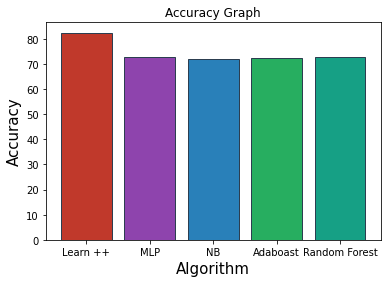

In [ ]:
blogs = ['Learn ++', 'MLP', 'NB', 'Adaboast', 'Random Forest']


# Creating a simple bar chart
plt.bar(blogs, acData, edgecolor='#2c3e50',
        color=['#c0392b', '#8e44ad', '#2980b9', '#27ae60', '#16a085', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=1)

plt.title('Accuracy Graph')
plt.xlabel('Algorithm', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()



In [ ]:
time = [0, 1, 2, 3]
iteration = []
for i in range(0, len(Error)):
  iteration.append(i)

plt.plot(iteration, Error, label='Decision Tree', linewidth=3, color="#c0392b")
plt.ylabel('Accuracy')
plt.xlabel('Iteration No')
plt.plot(iteration, mlpAcc, label='MLP', linewidth=3, color="#8e44ad")
plt.plot(iteration, nbAcc, label='Naive Bayes', linewidth=3, color="#27ae60")
plt.legend()
plt.show()